## Arbres de décision

---

### Application : prédire le type d'iris <a class="anchor" id="boston"></a>

#### Jeu de données 
Charger le jeu de données Iris</a> de sklearn <br>
Tips : 
* Utiliser la fonction *load_iris()* du package *sklearn.datasets*. Le résultat est affecté à la variable *dataset*
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 
* Transformer le *dataset* à un DataFrame, *df*, en utilisant *pandas* et les attributs *data* et *feature_names* du dictionnaire *data*
* Créer une variable $X$ qui représente les variables explicatives. 
* Créer une variable $y$ qui contient la variable expliquée (target)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
from sklearn import datasets

# chargement du jeu de données  
dataset = datasets.load_iris()
# variables dépendantes (features)
X = dataset.data
y = dataset.target

#### Données d'entraînement et de test
**Question :** <br>
Quel est l'avantage de diviser le jeu de données en données d'apprentissage et des données de test ? 

* Pour répondre à un problème métier, en général, on teste plusieurs modèles qui y répondre. 
* On a donc besoin d'un moyen pour choisir le meilleur modèle. 
* Notre objectif est d'étudier les performances des modèles sur de nouvelles données, hors des données échantillon. 
* Première solution : entraîner et tester le modèle avec le même jeu de données en divisant le jeu de données en données d'apprentissage (train dataset) et données de test (test dataset)

**Question :**<br>
Diviser le jeu de données en jeu de données d'entraînement (80%) et de test (20%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 42


In [7]:
# importer la méthode train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Question :** <br>
Quelle est la limite de la métode train_test_split sur la précision ? comment pallier à cette limite ? <br>
**Tips :** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-Folds cross-validation</a>, <a href="https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search">Grid Search</a> <br>

**Ressources**
* <a href="https://scikit-learn.org/stable/modules/cross_validation.html?highlight=cross_validation">Cross-validation scikit learn</a>
* <a href="https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85">Cross Validation Explained: Evaluating estimator performance.</a>
* <a href="http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_knn_cross_val.html">Validation croisée</a>


La validation croisée, ou cross validation, est une procédure d’échantillonnage utilisée pour évaluer les modèles d’apprentissage automatique sur un échantillon de données limité. 
Cette procédure est également appelée k-fold cross-validation où k fait référence au nombre de groupes dans lesquels un set de données doit être divisé. 
La validation croisée est principalement utilisée en apprentissage automatique pour estimer la performance d’un modèle sur des données « invisibles ». En effet, la méthode utilise un échantillon limité afin d’estimer comment le modèle devrait fonctionner en général lorsqu’il est utilisé pour faire des prédictions sur des données non utilisées pendant la phase d’apprentissage. 
Cette méthode est largement utilisée vu qu’elle est simple à comprendre et qu’elle aboutit généralement à une estimation non biaisée des performances des modèles contrairement à une simple répartition jeu d’apprentissage et jeu de test. <br>
La procédure générale de la validation croisée est comme suit : 
1.	Mélanger le jeu de données aléatoirement.
2.	Diviser le jeu de données en k groupes.
3.	Pour chaque groupe :
    * Considérer ce groupe comme jeu de test.
    * Considérer les autres groupes comme un jeu d’apprentissage.
    * Entrainer le modèle sur le jeu d’apprentissage et l’évaluer avec le jeu de test. 
    * Garder en mémoire le score d’évaluation 
4.	Résumer les performances du modèle
Il est important de noter que pour chaque observation de l’échantillon de données est affectée à un groupe individuel et reste dans ce groupe pendant la durée de la procédure. Cela signifie que chaque échantillon a la possibilité d’être utilisé dans le jeu de test une fois et k-1 fois dans le jeu d’entraînement. <br>
Les résultats d’un k-fold cross-validation sont souvent résumés avec la moyenne des scores des performances du modèle. Il est recommandé d’inclure une mesure de la variance comme l’écart-type. <br>
Le choix de la valeur de k est primordial. Une valeur mal choisie peut entrainer une idée erronée sur les performances du modèle comme par exemple un score avec une variance élevée ou encore une surestimation des performances. <br>
Pour choisir la valeur de k trois stratégies sont communément utilisées : 
* Une valeur représentative : la valeur de k est choisie de telle sorte que chaque jeu d’entrainement et de test soit suffisamment grand pour être statistiquement représentatif de l’ensemble des données. 
* k=10 : La valeur de k est fixée à 10. Il s’agit d’une valeur qui a été trouvée pas l’expérimentation pour aboutir généralement à une bonne estimation des performances du modèle avec un biais faible et une petite variance. 
* k=n : la valeur de k est fixée à n, où n est la taille de l’ensemble du jeu de donnée pour donner à chaque échantillon d’être utilisé dans le jeu de test. Cette approche est appelée **leave-one-out- cross-validation**. 




#### Modèle | DecisionTreeClassifier
Utiliser la classe *DecisionTreeClassifier* du package *sklearn.tree* pour créer l'objet *classifier*<br>
Utiliser les paramètres par défaut.

In [9]:
# importer la classe DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

**Question :** Quels sont les paramètres de la classe *DecisionTreeClassifier* qui influencent la performance de l'algorithme ?  <br>
**Ressources** <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassfier#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a> <br>
<a href="https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3">InDepth : Parameter tuning for Decision Tree (classification)</a>

Les paramètres à optimiser pour un arbre de décision optimal sont les suivants : 
* **max_depth** : indique la profondeur de l'arbre. La profondeur détermine le nombre de feuilles (nombre de valeurs possibles).<br> Plus l'arbre est profond, plus il est divisé, plus il apprend des données. 
* **min_samples_split** : chaque feuille d'un arbre prédit une valeur calculée à partir d'un ensemble d'observations. Ce nombre ne peut pas être inférieur à la valeur de ce paramètre. <br> Ce paramètre est utilisé pour limiter le surapprentissage en augmentant la représentativité de chaque feuille. 
* **min_samples_leaf** : indique le nombre minimum d'observations requises pour être au niveau d'un noeud feuille. Plus la valeur est grande, plus on risque d'avoir un problème de sous-apprentissage. 
* **max_feautures** : représente le nombre de features à prendre en considération lors de la recherche de la meilleure découpe (split). 

**Question :** <br>
Créer les deux sous-ensemble de données d'apprentissage et de test en utilisant la technique de validation croisée. <br>
Stocker le résultat dans la variable *cv_sets*. <br>
Utiliser les paramètres suivants :
* $n\_splits$ = $10$
* $shuffle$ = $True$ 
* $random\_state$ = $42$ <br>
Tips : Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold">*KFold*</a> du package *sklearn.model-selection*

In [10]:
from sklearn.model_selection import KFold
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

**NB** : Dans ce qui suit, on se focalisera sur le premier paramètre, à savoir, **max_depth**. Le même raisonnement peut être appliqué à chacun des paramètres ou à une combinaison de paramètres. 

#### Entraînement de l'arbre de décision 

##### Optimisation du paramètre max_depth
Pour trouver la valeur du paramètre max_depth qui donne le meilleur estimateur (meilleur arbre de régression), on utilise la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV">GridSearchCV</a>. <br>
Pour cela, il faut suivre les étapes suivantes !

**Question** : Créer un dictionnaire pour *max_depth* avec les valeurs de 1 à 10. <br>
Affecter-le à la variable *params*

In [11]:
params = dict(max_depth=range(1,10))

In [15]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(classifier, params, cv=cv_sets, scoring='accuracy')

**Question** : Entraîner le méta estimateur grid_cv pour trouver l'estimateur optimal en utilisant la méthode *fit*. <br>

In [16]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, scoring='accuracy')

**Question** : <br>
Quel est le meilleur modèle ? <br>
Stocker le meilleur modèle dans la variable *best_tree*<br>
**Tips** : Utiliser l'attribut *best_estimator_*

In [17]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=2)

**Question** : <br>
Quelle est la profondeur maximale (*max_depth*) du modèle optimal (best_tree) ? <br>
**Tips** : Utiliser l'attribut *best_params_* de la classe *GridSearchCV*

In [18]:
best_params = grid_cv.best_params_
best_params

{'max_depth': 2}

In [22]:
y_pred=best_tree.predict(X_test)

##### Courbe d'apprentissage

**Question** : <br>
Qu'est ce que la courbre d'apprentissage ? <br>
**Ressource** : <a href="https://fr.qaz.wiki/wiki/Learning_curve_(machine_learning)">Courbe d'apprentissage</a>

* Une courbe d'apprentissage trace la valeur optimale de la fonction de perte d'un modèle pour un ensemble d'apprentissage par rapport à cette fonction de perte évaluée sur un ensemble de données de validation avec les mêmes paramètres que la fonction optimale produite. 
* C'est un outil qui permet de déterminer à quel point un modèle de ML profite de l'ajout de données d'apprentissage supplémentaires et si l'estimateur souffre d'une erreur de variance ou d'une erreur de biais. 
* Si le score de validation et le score d'entraînement convergent vers une valeur trop faible avec l'augmentation de la taille de l'ensemble d'apprentissage, il ne bénéficiera pas beaucoup de plus de données d'entraînement.
* Deux utilisations des courbes d'apprentissage différant sur l'axe des x des courbes, l'expérience du modèle étant représentée graphiquement soit par 
    * le nombre d'exemples d'entraînement utilisés pour l'apprentissage, 
    * le nombre d'itérations utilisées dans l'apprentissage du modèle. 

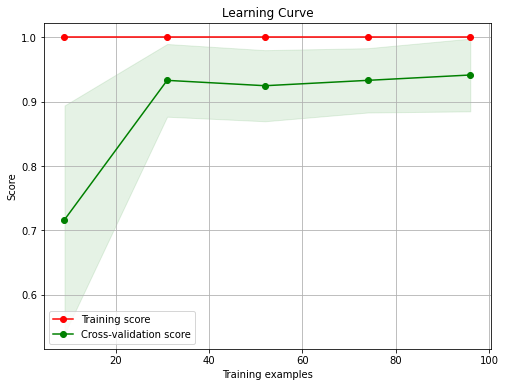

In [24]:

import scikitplot as skplt
skplt.estimators.plot_learning_curve(classifier, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

### Pour aller plus loin : <a class="anchor" id="post_pruning"></a>
<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py">Post élagage avec scikit learn | Exemple </a>